In [339]:
import numpy as np
import pandas as pd

In [340]:
Data = pd.read_csv("Bias_correction_ucl.csv")

In [342]:
# enccoding catogorical

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Data['Date'] = le.fit_transform(Data['Date'])

In [343]:
# Replacing Nan values with mean value

Data.replace([np.inf, -np.inf], np.nan, inplace=True)
Data=Data.fillna(Data.mean())


In [344]:
# Spliting data

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(Data, test_size = 0.2, random_state=10)

Y_train = X_train['Next_Tmax']
Y_test = X_test['Next_Tmax']

print(type(Y_train))
print(X_test.shape)
Y_test.shape

<class 'pandas.core.series.Series'>
(1551, 25)


(1551,)

In [345]:
X_train.drop(columns=['Next_Tmax'])
X_test.drop(columns=['Next_Tmax'])

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
6271,22.0,250,27.6,23.8,82.659302,98.173332,25.880775,23.297214,10.177009,69.724832,...,5.296227,3.557506,0.000000,0.070359,37.5102,127.086,21.9668,0.1332,5841.537598,22.5
493,19.0,19,29.4,23.5,65.926697,82.918251,29.571686,25.658716,10.119713,29.588685,...,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5692.742676,24.1
5955,6.0,238,35.7,27.7,42.154407,74.213478,34.502823,26.153486,6.213467,71.456794,...,0.000000,0.000000,0.019931,0.000000,37.5102,127.042,54.6384,0.1457,4764.229492,26.5
1084,10.0,43,31.9,24.9,49.132504,86.906128,31.680390,25.743212,6.933404,70.164116,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5052.172363,23.9
5229,5.0,209,30.2,26.4,87.027557,96.315842,27.319403,24.987842,6.712139,40.962481,...,0.057034,4.497195,1.808847,0.161392,37.5507,127.135,35.0380,0.5055,5566.146973,25.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,25.0,306,26.6,20.7,51.889240,88.492317,26.850981,21.182844,7.735349,37.386415,...,0.000000,0.000000,0.021030,3.093815,37.5237,126.970,19.5844,0.2713,4568.769043,18.5
3940,16.0,157,29.0,23.2,66.779572,91.010399,30.911826,25.446213,9.393345,92.315415,...,0.000000,0.008095,0.000000,0.000000,37.4697,126.995,82.2912,2.2579,5349.663086,24.0
5765,16.0,230,33.4,24.5,76.616196,90.628593,29.179867,26.714100,5.078204,42.382042,...,0.000000,0.051112,0.164599,0.013888,37.4697,126.995,82.2912,2.2579,4997.796875,25.7
6576,2.0,263,26.9,22.7,79.934273,94.464485,27.534524,23.870984,8.459919,31.728473,...,8.568732,8.527852,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5727.288086,22.6


In [346]:
Y_train =pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
print(Y_train)
print(Y_test.shape)

      Next_Tmax
4221       31.8
5034       22.2
3240       30.6
6274       29.4
1540       28.2
...         ...
3441       31.9
1344       28.3
4623       31.0
7293       27.7
1289       34.3

[6201 rows x 1 columns]
(1551, 1)


In [488]:
# Normlizing

scaler =preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)


In [414]:
Y_train.shape

(6201, 1)

In [415]:
from sklearn import neural_network
model1 = neural_network.MLPRegressor( activation='relu',  solver='sgd',
                                     alpha=0.0001, batch_size='auto', verbose=True)

In [416]:
mlpreg1 = model1.fit(X_train, Y_train.ravel())

Iteration 1, loss = 0.09915069
Iteration 2, loss = 0.02462281
Iteration 3, loss = 0.01881778
Iteration 4, loss = 0.01581464
Iteration 5, loss = 0.01337869
Iteration 6, loss = 0.01148384
Iteration 7, loss = 0.01002624
Iteration 8, loss = 0.00891365
Iteration 9, loss = 0.00794129
Iteration 10, loss = 0.00718980
Iteration 11, loss = 0.00660627
Iteration 12, loss = 0.00611753
Iteration 13, loss = 0.00570297
Iteration 14, loss = 0.00536752
Iteration 15, loss = 0.00505254
Iteration 16, loss = 0.00478998
Iteration 17, loss = 0.00455896
Iteration 18, loss = 0.00434863
Iteration 19, loss = 0.00415046
Iteration 20, loss = 0.00399380
Iteration 21, loss = 0.00385180
Iteration 22, loss = 0.00373356
Iteration 23, loss = 0.00358265
Iteration 24, loss = 0.00345397
Iteration 25, loss = 0.00335180
Iteration 26, loss = 0.00325895
Iteration 27, loss = 0.00317147
Iteration 28, loss = 0.00309247
Iteration 29, loss = 0.00302044
Iteration 30, loss = 0.00294644
Iteration 31, loss = 0.00287571
Iteration 32, los

In [417]:
mlpreg1.predict(X_test)

array([0.46205334, 0.63130709, 0.83235346, ..., 0.62940303, 0.5161539 ,
       0.63887742])

In [418]:
mlpreg1.score(X_test, Y_test)

0.7527129852010557

In [419]:
from sklearn.metrics import mean_absolute_error
pred1 = mlpreg1.predict(X_test)
MAE1 = mean_absolute_error(Y_test, pred1)
print(MAE1)

0.06660156426780875


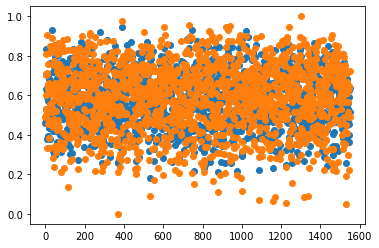

In [473]:
import matplotlib.pyplot as plt
x= np.array(range(1551))

plt.plot(x, pred1, marker="o",linestyle="")

plt.plot(x, Y_test, marker="o",linestyle="")
plt.show()

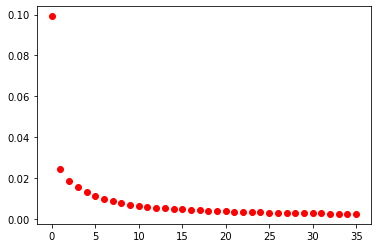

In [460]:
x_points = np.array(range(len(mlpreg1.loss_curve_)))
plt.plot(x_points, mlpreg1.loss_curve_, marker="o",linestyle="", color="r")
plt.show()

In [482]:
from sklearn import neural_network
model2 = neural_network.MLPRegressor(hidden_layer_sizes=(100,60),random_state=5 ,activation='relu',  solver='sgd',
                                     alpha=0.0001, batch_size='auto', verbose=True)

In [483]:
mlpreg2 = model2.fit(X_train, Y_train.ravel())

Iteration 1, loss = 0.08194897
Iteration 2, loss = 0.01387008
Iteration 3, loss = 0.01021070
Iteration 4, loss = 0.00828833
Iteration 5, loss = 0.00690609
Iteration 6, loss = 0.00581634
Iteration 7, loss = 0.00501829
Iteration 8, loss = 0.00439482
Iteration 9, loss = 0.00394250
Iteration 10, loss = 0.00360879
Iteration 11, loss = 0.00333389
Iteration 12, loss = 0.00316001
Iteration 13, loss = 0.00299033
Iteration 14, loss = 0.00287624
Iteration 15, loss = 0.00277225
Iteration 16, loss = 0.00269454
Iteration 17, loss = 0.00261024
Iteration 18, loss = 0.00254572
Iteration 19, loss = 0.00248186
Iteration 20, loss = 0.00242893
Iteration 21, loss = 0.00242225
Iteration 22, loss = 0.00234450
Iteration 23, loss = 0.00230039
Iteration 24, loss = 0.00226070
Iteration 25, loss = 0.00222614
Iteration 26, loss = 0.00218397
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [485]:
from sklearn.metrics import mean_absolute_error
pred2 = mlpreg2.predict(X_test)
MAE2 = mean_absolute_error(Y_test, pred2)
print(MAE2)
print(mlpreg2.score(X_test, Y_test))

0.05838818794811205
0.8081355542561329


(1551,)


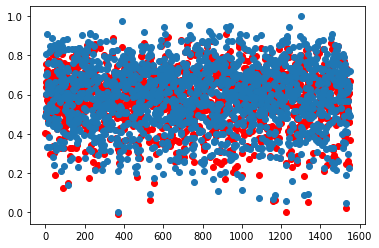

In [486]:
import matplotlib.pyplot as plt
x = np.array(range(1551))
print(x.shape)
plt.plot(x, pred2, marker="o",linestyle="", color="r")

plt.plot(x, Y_test, marker="o",linestyle="")
plt.show()

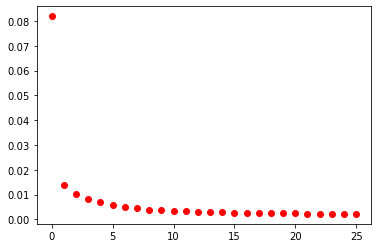

In [487]:
x_points = np.array(range(len(mlpreg2.loss_curve_)))
plt.plot(x_points, mlpreg2.loss_curve_, marker="o",linestyle="", color="r")
plt.show()

In [467]:
from sklearn import neural_network
model3 = neural_network.MLPRegressor(hidden_layer_sizes=(100,100),activation='relu', random_state=15, solver='adam',
                                     alpha=0.0001, batch_size='auto', verbose=True)
mlpreg3 = model3.fit(X_train, Y_train.ravel())

Iteration 1, loss = 0.01290583
Iteration 2, loss = 0.00209445
Iteration 3, loss = 0.00126919
Iteration 4, loss = 0.00085974
Iteration 5, loss = 0.00067550
Iteration 6, loss = 0.00052465
Iteration 7, loss = 0.00034945
Iteration 8, loss = 0.00028576
Iteration 9, loss = 0.00023820
Iteration 10, loss = 0.00015883
Iteration 11, loss = 0.00013639
Iteration 12, loss = 0.00011756
Iteration 13, loss = 0.00010237
Iteration 14, loss = 0.00008319
Iteration 15, loss = 0.00009276
Iteration 16, loss = 0.00007766
Iteration 17, loss = 0.00006723
Iteration 18, loss = 0.00006402
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [470]:
from sklearn.metrics import mean_absolute_error
pred3 = mlpreg3.predict(X_test)
MAE3 = mean_absolute_error(Y_test, pred3)
print(MAE3)

0.007968722389040252


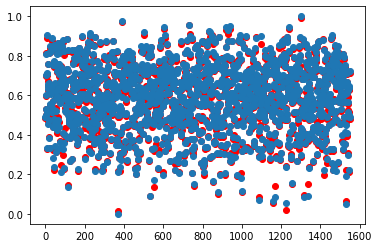

In [472]:
import matplotlib.pyplot as plt
x = np.array(range(1551))
plt.plot(x, pred3, marker="o",linestyle="", color="r")
plt.plot(x, Y_test, marker="o",linestyle="")
plt.show()

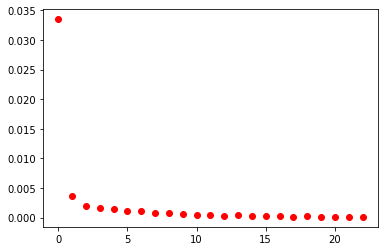

In [451]:
x_points = np.array(range(len(mlpreg3.loss_curve_)))
plt.plot(x_points, mlpreg3.loss_curve_, marker="o",linestyle="", color="r")
plt.show()

In [452]:
from sklearn import neural_network
model4 = neural_network.MLPRegressor(hidden_layer_sizes=(150,),activation='logistic',  solver='adam',
                                     alpha=0.0001, batch_size='auto', verbose=True)
mlpreg4 = model4.fit(X_train, Y_train.ravel())

Iteration 1, loss = 0.01410667
Iteration 2, loss = 0.00697184
Iteration 3, loss = 0.00487075
Iteration 4, loss = 0.00393841
Iteration 5, loss = 0.00322085
Iteration 6, loss = 0.00285901
Iteration 7, loss = 0.00246184
Iteration 8, loss = 0.00222381
Iteration 9, loss = 0.00212604
Iteration 10, loss = 0.00185945
Iteration 11, loss = 0.00173643
Iteration 12, loss = 0.00166238
Iteration 13, loss = 0.00156195
Iteration 14, loss = 0.00160094
Iteration 15, loss = 0.00160729
Iteration 16, loss = 0.00220209
Iteration 17, loss = 0.00137056
Iteration 18, loss = 0.00128707
Iteration 19, loss = 0.00120721
Iteration 20, loss = 0.00123171
Iteration 21, loss = 0.00110332
Iteration 22, loss = 0.00106079
Iteration 23, loss = 0.00099645
Iteration 24, loss = 0.00096363
Iteration 25, loss = 0.00091903
Iteration 26, loss = 0.00115360
Iteration 27, loss = 0.00084333
Iteration 28, loss = 0.00079066
Iteration 29, loss = 0.00086457
Iteration 30, loss = 0.00070458
Iteration 31, loss = 0.00069429
Iteration 32, los

In [453]:
from sklearn.metrics import mean_absolute_error
pred4 = mlpreg4.predict(X_test)
MAE4 = mean_absolute_error(Y_test, pred4)
print(MAE4)

0.032296378600648185


(1551,)


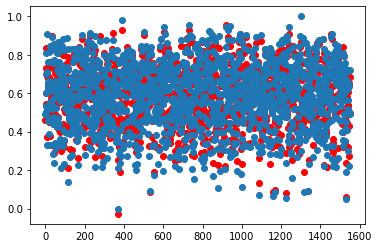

In [454]:
import matplotlib.pyplot as plt
x = np.array(range(1551))
print(x.shape)
plt.plot(x, pred4, marker="o",linestyle="", color="r")

plt.plot(x, Y_test, marker="o",linestyle="")
plt.show()

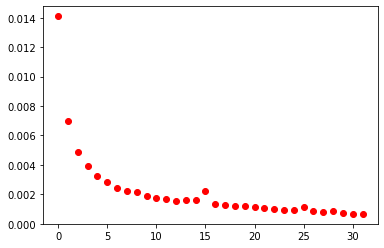

In [455]:
x_points = np.array(range(len(mlpreg4.loss_curve_)))
plt.plot(x_points, mlpreg4.loss_curve_, marker="o",linestyle="", color="r")
plt.show()

In [456]:
from sklearn import neural_network
model5 = neural_network.MLPRegressor(hidden_layer_sizes=(150,),activation='logistic',  solver='lbfgs',
                                     alpha=0.0001, batch_size='auto',random_state=10, verbose=True)
mlpreg5 = model5.fit(X_train, Y_train.ravel())

In [457]:
from sklearn.metrics import mean_absolute_error
pred5 = mlpreg5.predict(X_test)
MAE5 = mean_absolute_error(Y_test, pred5)
print(MAE5)

0.011435336808874975


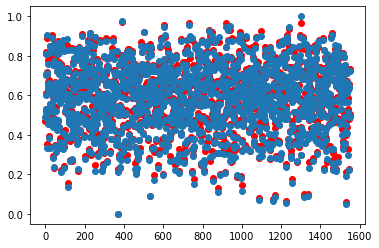

In [458]:
import matplotlib.pyplot as plt
x = np.array(range(1551))
plt.plot(x, pred5, marker="o",linestyle="", color="r")

plt.plot(x, Y_test, marker="o",linestyle="")
plt.show()

In [497]:
mae_list = [MAE1,MAE2,MAE3,MAE4,MAE5]
from statistics import mean
TOTAL_MAE = mean(mae_list)
print("Total mean absolute error is :",TOTAL_MAE)

Total mean absolute error is : 0.035338038002896845
